In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [11]:
# loading data
df = pd.read_csv('./HW2 Data/project_data.csv')
df.dropna(inplace=True)
df.head()

,Date,Type of Exercise,Duration of Exercise,Intensity,Time of Day of Exercise,Sleep Quality (out of 10),Sleep Time
0,2/7,Arms and Shoulders,2 hr 0 min,Moderate,7:00 PM,6.50,7 hr 45 min
1,2/8,Legs,1 hr 15 min,Intense,1:00 PM,5.00,9 hrs 0 min
2,2/9,Running,0 hr 25 min,Moderate,6:00 PM,7.00,7 hrs 0 min
4,2/11,Chest and Back,1 hr 30 min,Moderate,5:00 PM,5.75,7 hr 20 min
5,2/12,Climbing,1 hr 0 min,Easy,5:00 PM,6.25,9 hr 1 min


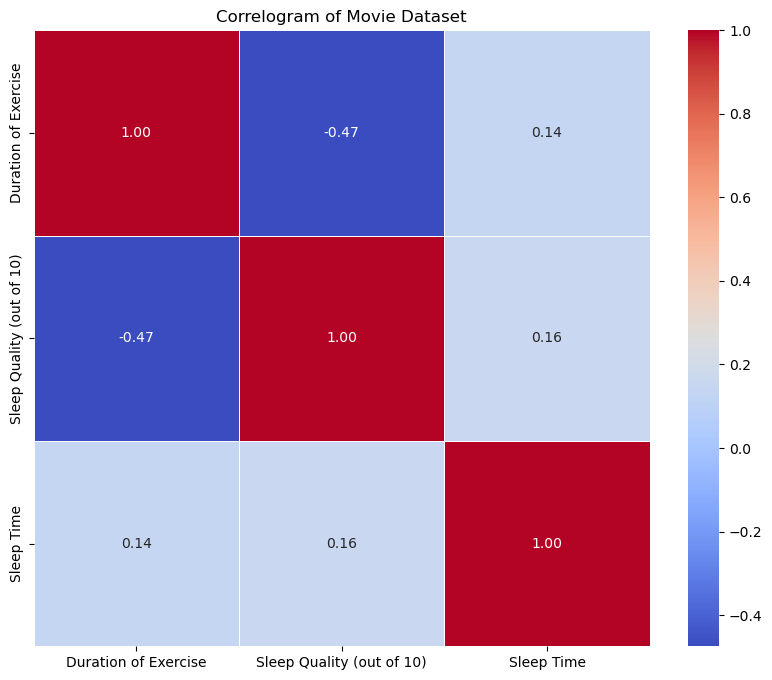

In [12]:
# lets make a covariance matrix
df_matrix = df.drop(columns=['Date', 'Type of Exercise', 'Intensity', 'Time of Day of Exercise'])

# Function to convert time in the format 'X hr Y min' to numerical value in hours
def time_to_hours(time):
    time_parts = time.split(' ')
    if len(time_parts) == 4:
        hours = int(time_parts[0]) * 60
        minutes = int(time_parts[2])
        total_minutes = hours + minutes
        total_hours = total_minutes / 60
        return total_hours
    else:
        return 0

df_matrix['Sleep Time'] = df_matrix['Sleep Time'].apply(time_to_hours)
df_matrix['Duration of Exercise'] = df_matrix['Duration of Exercise'].apply(time_to_hours)

# Calculate the covariance matrix
corr_matrix = df_matrix.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

plt.title('Correlogram of Movie Dataset')
plt.show()



/var/folders/0d/lzd4_bln5456tqbpclpkwljc0000gn/T/ipykernel_8395/2108492503.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Sleep Time'] = df2['Sleep Time'].apply(time_to_hours)
/var/folders/0d/lzd4_bln5456tqbpclpkwljc0000gn/T/ipykernel_8395/2108492503.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Intensity_Numeric'] = df2['Intensity'].map(intensity_map)


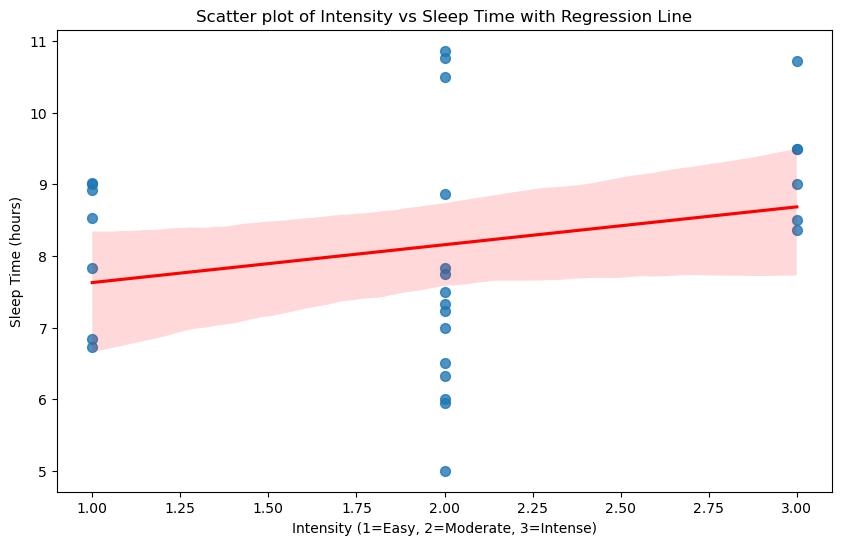

In [13]:
# create new df with only the columns we want to use
df2 = df[['Intensity', 'Sleep Time']]
df2['Sleep Time'] = df2['Sleep Time'].apply(time_to_hours)

# Map text intensity levels to numeric values
intensity_map = {'Easy': 1, 'Moderate': 2, 'Intense': 3}
df2['Intensity_Numeric'] = df2['Intensity'].map(intensity_map)

# Plot x and y coordinates to see if there is any correlation
plt.figure(figsize=(10, 6))
sns.regplot(x='Intensity_Numeric', y='Sleep Time', data=df2, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.xlabel('Intensity (1=Easy, 2=Moderate, 3=Intense)')
plt.ylabel('Sleep Time (hours)')
plt.title('Scatter plot of Intensity vs Sleep Time with Regression Line')
plt.show()